<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week6/Day3/DC_w6_d3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
df.head()



,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [30]:
#clean data:
df.dropna(inplace=True)

df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
217,1/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,14.0,2.0,16.0,14.0,2.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
247,3/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,6.0,2.0,8.0,6.0,2.0,0.0,"Shortly after taking off from Kansas City, one..."
348,8/31/1934,22:45,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5.0,4.0,1.0,5.0,4.0,1.0,0.0,The plane crashed about 11 miles from St. Jose...
370,5/6/1935,3:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,12.0,2.0,5.0,3.0,2.0,0.0,The plane crashed while en route from Albuquer...
384,8/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,3.0,1.0,4.0,3.0,1.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...


Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

In [25]:
num_crashes = df['Registration'].nunique()
print(f"Number of Crashes: {num_crashes}")


Number of Crashes: 1244


In [31]:
num_fatalities = df['Fatalities'].sum()
print(f"Number of Fatalities: {num_fatalities}")

Number of Fatalities: 55752.0


In [38]:
df['Survival']=df['Aboard']-df['Fatalities'] # create new colomn with number Survival
num_survival = df['Survival'].sum()
print(f"Number of Survival: {num_survival}")

Number of Survival: 23680.0


In [40]:
survival_rate = num_survival / (num_survival+num_fatalities)
print(f"Survival Rate: {survival_rate:.2%}")

Survival Rate: 29.81%


Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

In [48]:
from scipy.stats import describe, ttest_ind

fatalities_stats = describe(df['Fatalities'])
print("Fatalities Statistics:")
print(fatalities_stats)



survival_stats = describe(df['Survival'])
print("\nSurvival Statistics:")
print(survival_stats)



t_statistic, p_value = ttest_ind(df[df['Date'] == '2000s']['Fatalities'],
                                  df[df['Date'] == '2010s']['Fatalities'])


print("\nHypothesis Test Results:")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")



Fatalities Statistics:
DescribeResult(nobs=1245, minmax=(0.0, 583.0), mean=44.78072289156626, variance=3190.1632936892265, skewness=2.8558022117607558, kurtosis=14.070901557283584)

Survival Statistics:
DescribeResult(nobs=1245, minmax=(0.0, 516.0), mean=19.02008032128514, variance=2529.641879414765, skewness=4.377273118034334, kurtosis=23.605428984006757)

Hypothesis Test Results:
T-Statistic: nan
P-Value: nan


Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

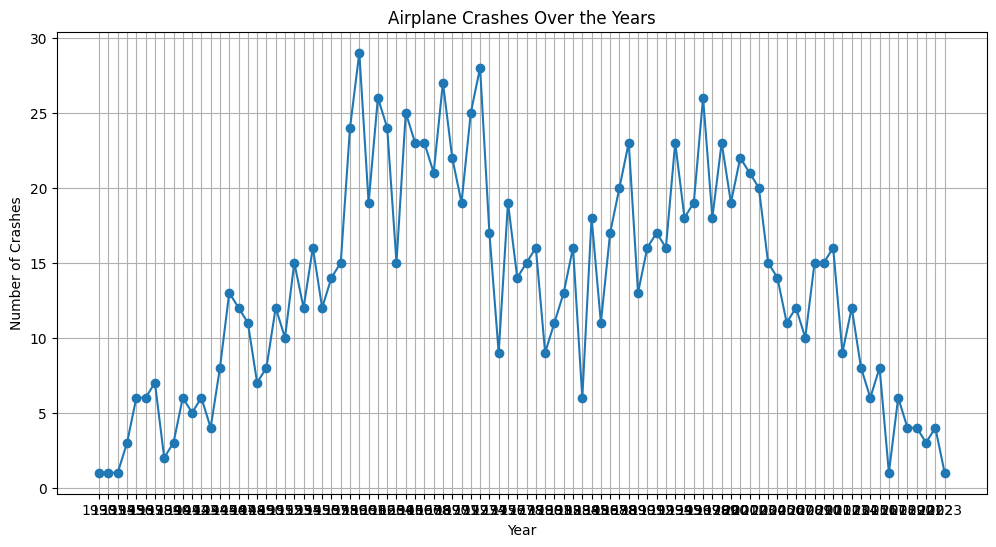

In [79]:
#time series plots of crashes over years
df['Year'] = df['Date'].str.split('/').str[2]# create column year

crashes_per_year = df['Year'].value_counts().sort_index()

# Plotting the time series
plt.figure(figsize=(12, 6)) # can be changed to diferent sizes
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='-')
plt.title('Airplane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


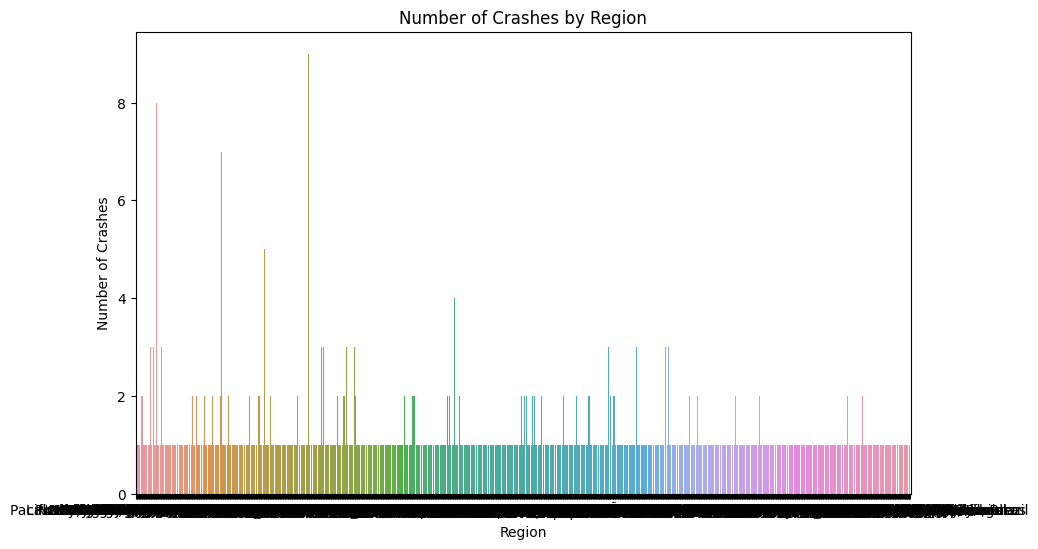

In [80]:
#bar charts of crashes by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df)
plt.title('Number of Crashes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Crashes')
plt.show()



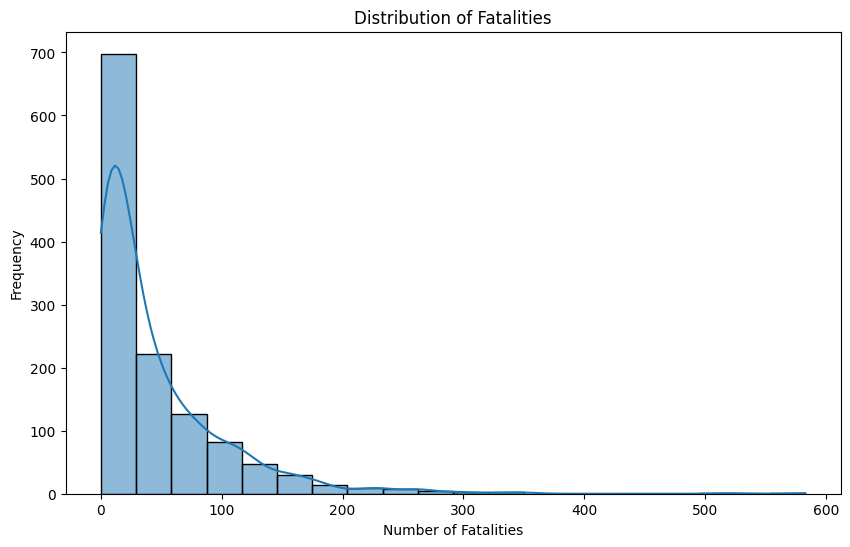

In [81]:
#histograms of fatalities.
plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], bins=20, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()